# Case Study (Airbnb Rental Price)


In [153]:
# Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Airbnb is a tech company that enables hosts to rent out their homes, apartments, or rooms to guests interested in temporary lodging. One of the key challenges hosts face is optimizing the rent prices for the customers.


## Problem Statement:


     Using Machine Learning, predict the optimal Airbnb listing price in NYC given listing information (e.g. bedrooms, type of bed, location, ratings, etc.)


### Data


In [154]:
df = pd.read_csv("airbnb_listings.csv", encoding="iso-8859-1")

In [155]:
df.head()

,host_id,host_name,city,state,zipcode,country,latitude,longitude,property_type,room_type,...,beds,bed_type,square_feet,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
0,5867023,Michael,New York,NY,10022-4175,United States,40.756852,-73.964754,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$160.00,322,62,86.0,7.0,10.0,9.0
1,2631556,Denise,New York,NY,NaN,United States,40.830599,-73.941014,Apartment,Entire home/apt,...,3.0,Real Bed,NaN,$105.00,348,22,85.0,8.0,7.0,8.0
2,4601412,Miao,Brooklyn,NY,11221,United States,40.692189,-73.924120,Apartment,Private room,...,2.0,Real Bed,NaN,$58.00,227,35,98.0,10.0,9.0,10.0
3,198425,Sara,New York,NY,10011,United States,40.734751,-74.002592,Apartment,Entire home/apt,...,1.0,Real Bed,NaN,$185.00,274,26,96.0,9.0,10.0,9.0
4,22590025,Charles,New York,NY,10011,United States,40.745282,-73.997836,Apartment,Entire home/apt,...,2.0,Real Bed,NaN,$195.00,365,1,100.0,10.0,10.0,10.0


## Define problem statement and perform Exploratory Data Analysis


### Observations on shape of data and data types of all attributes


In [156]:
df.shape

(27392, 23)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27392 entries, 0 to 27391
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    27392 non-null  int64  
 1   host_name                  27392 non-null  object 
 2   city                       27392 non-null  object 
 3   state                      27390 non-null  object 
 4   zipcode                    27230 non-null  object 
 5   country                    27391 non-null  object 
 6   latitude                   27392 non-null  float64
 7   longitude                  27392 non-null  float64
 8   property_type              27386 non-null  object 
 9   room_type                  27392 non-null  object 
 10  accommodates               27392 non-null  int64  
 11  bathrooms                  26929 non-null  float64
 12  bedrooms                   27252 non-null  float64
 13  beds                       27294 non-null  flo

------------
------------

### Check for missing value


In [158]:
df.isna().sum()[df.isna().sum() > 0]

state                            2
zipcode                        162
country                          1
property_type                    6
bathrooms                      463
bedrooms                       140
beds                            98
square_feet                  26386
review_scores_rating          8657
review_scores_cleanliness     8731
review_scores_location        8732
review_scores_value           8734
dtype: int64

In [159]:
# dropping square_feet column as it has more than 90% missing values
df = df.drop("square_feet", axis=1)

Total number of missing values


In [160]:
df.isna().sum().sum()


35726

----------
----------

### Display the statistical summary


In [161]:
df.describe()

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
count,2.739200e+04,27392.000000,27392.000000,27392.000000,26929.000000,27252.000000,27294.000000,27392.000000,27392.000000,18735.000000,18661.000000,18660.000000,18658.000000
mean,8.518927e+06,40.733070,-73.964276,2.892779,1.116287,1.135660,1.531289,262.919210,10.130221,92.218895,9.011093,9.248660,9.125737
std,7.510027e+06,0.048968,0.035162,1.755137,0.369832,0.667599,1.098971,125.668249,18.665400,8.336264,1.163870,0.973474,0.906612
min,2.830000e+02,40.509611,-74.239539,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000
25%,2.104498e+06,40.699655,-73.988449,2.000000,1.000000,1.000000,1.000000,177.000000,0.000000,89.000000,8.000000,9.000000,9.000000
50%,6.119374e+06,40.728024,-73.966075,2.000000,1.000000,1.000000,1.000000,333.000000,3.000000,94.000000,9.000000,10.000000,9.000000
75%,1.392422e+07,40.764030,-73.947260,4.000000,1.000000,1.000000,2.000000,363.000000,11.000000,99.000000,10.000000,10.000000,10.000000
max,2.546867e+07,40.907704,-73.726710,16.000000,8.000000,10.000000,16.000000,365.000000,221.000000,100.000000,10.000000,10.000000,10.000000


----------
----------

### Univariate Analysis and Bivariate Analysis of all the attributes


In [162]:
# converting price to float
df["price"] = df["price"].str.replace("$", "")
df["price"] = df["price"].str.replace(",", "")
df["price"] = df["price"].astype(float)
df["price"].head()

0    160.0
1    105.0
2     58.0
3    185.0
4    195.0
Name: price, dtype: float64

In [163]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[object]).columns

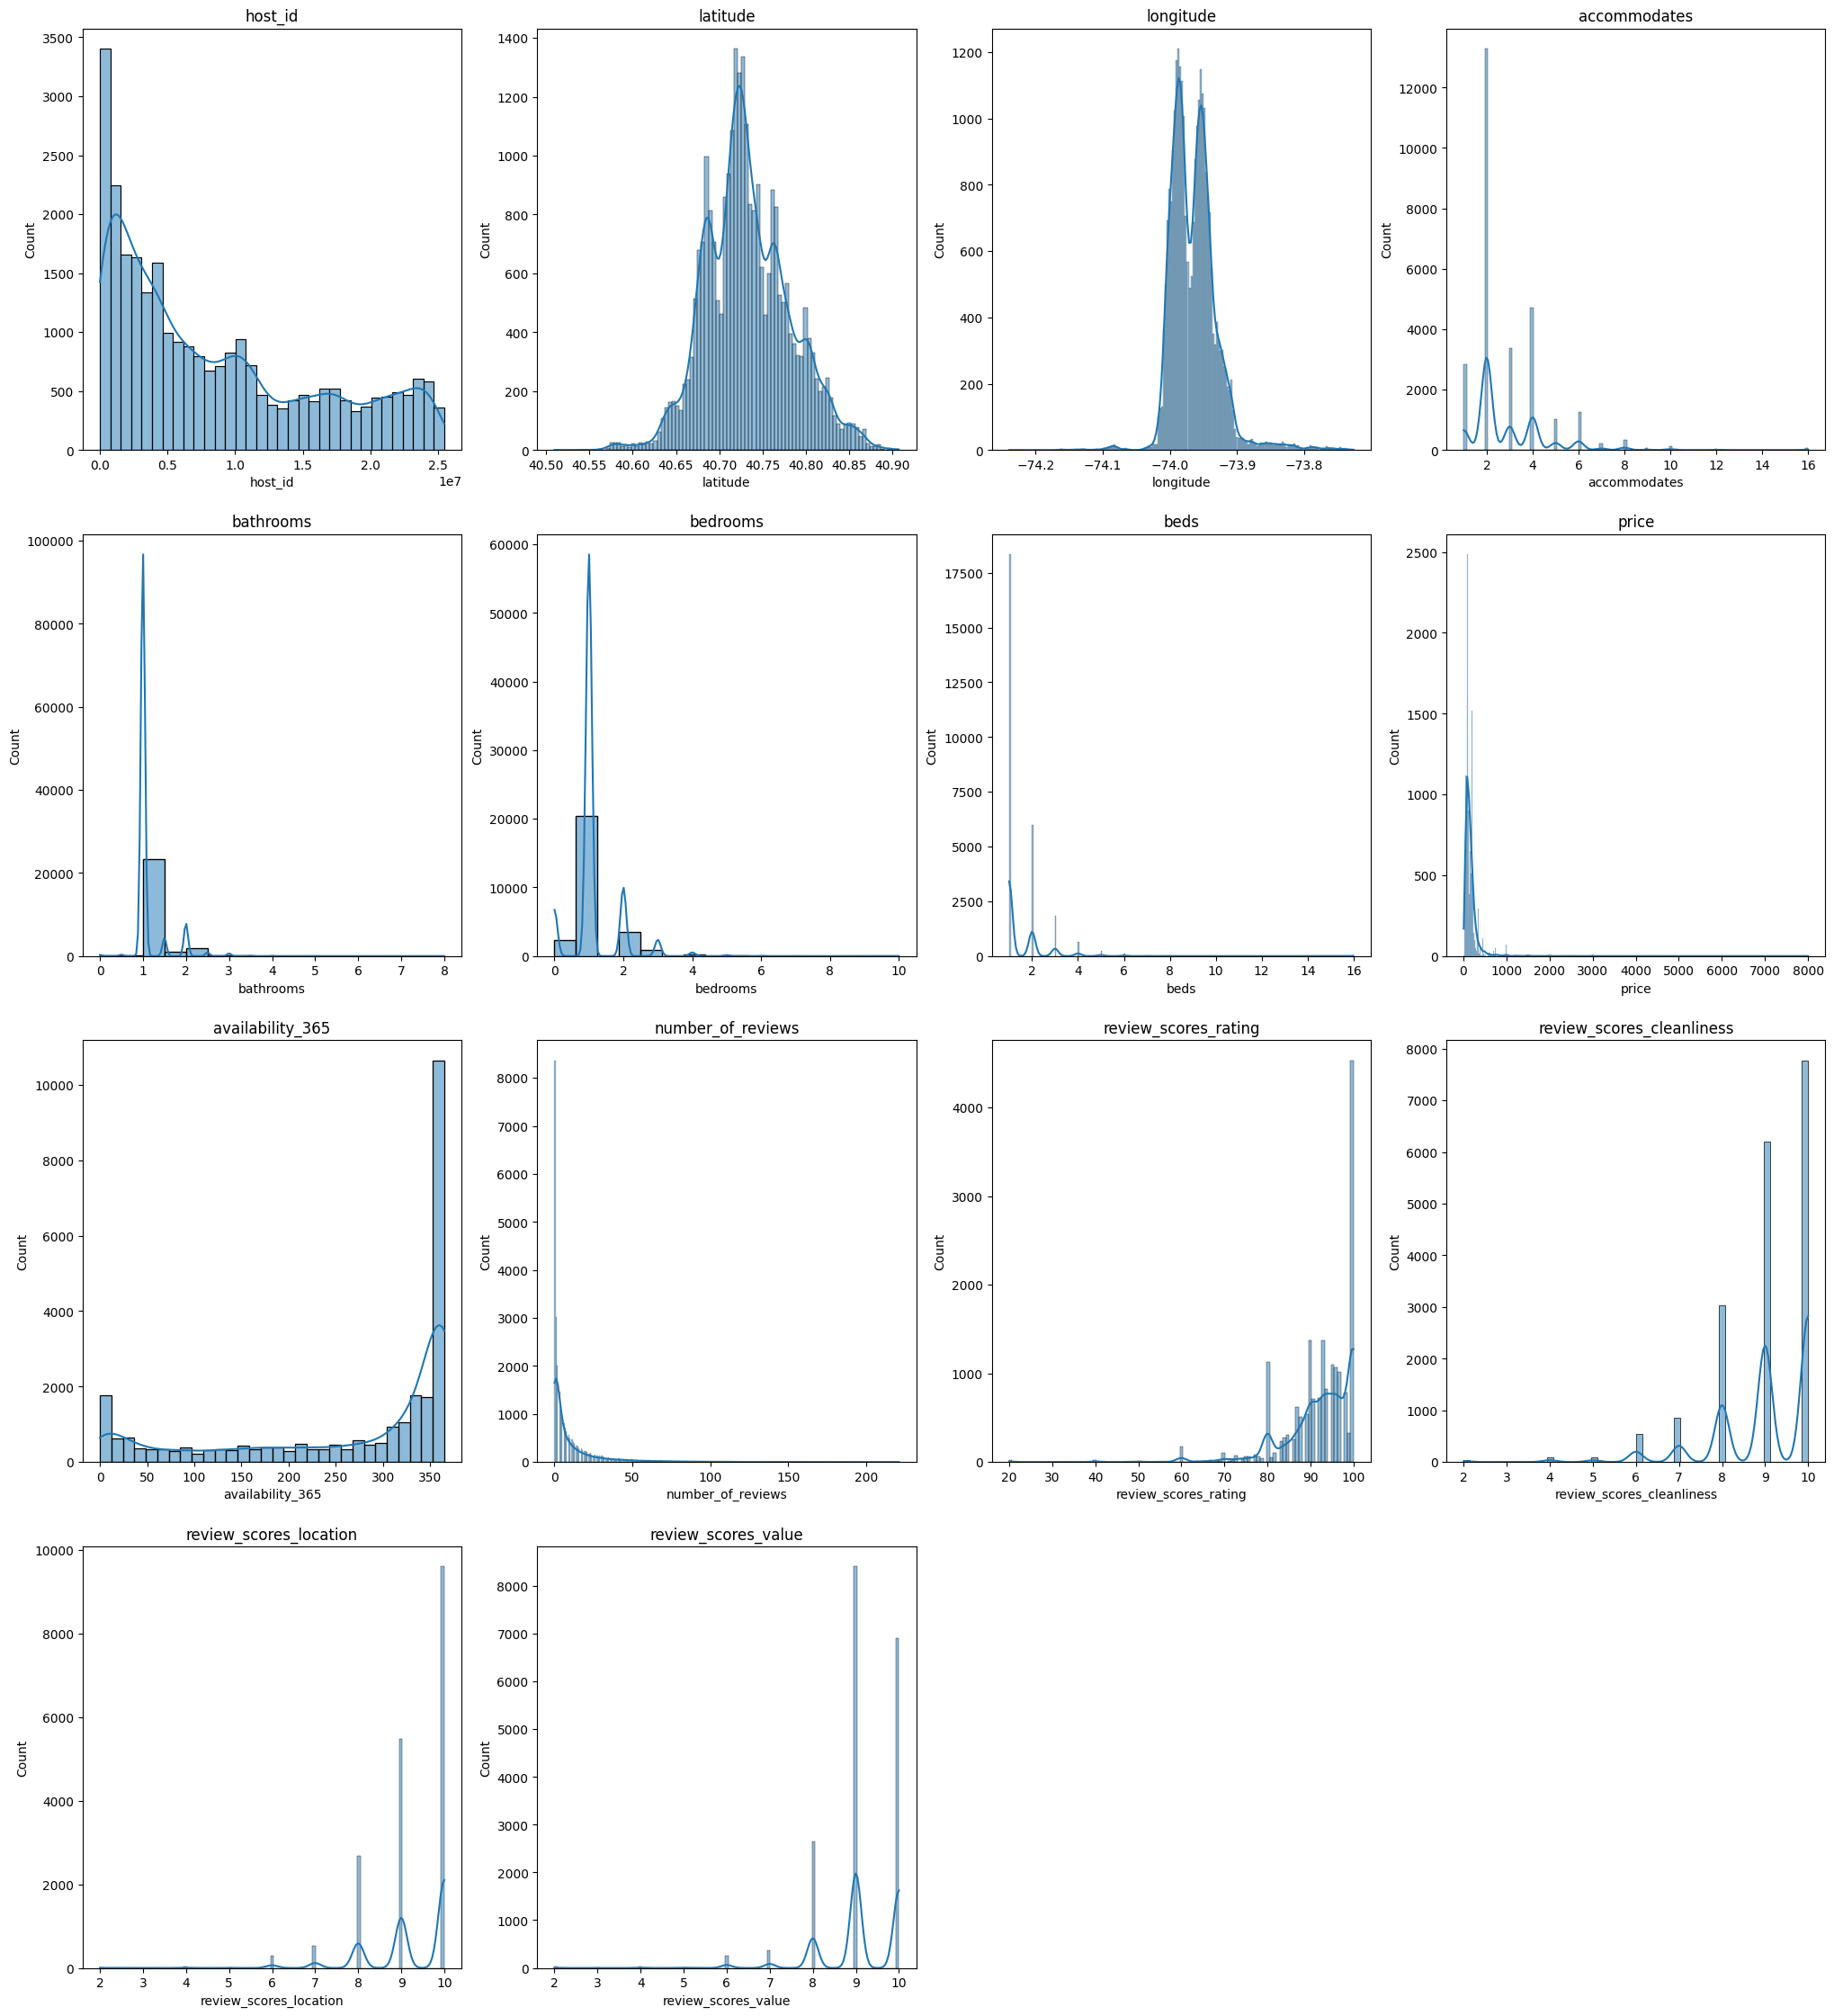

In [164]:
# numerical features
i = 1
plt.figure(figsize=(25, 28))
for col in numerical_features:
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    i += 1
plt.show()


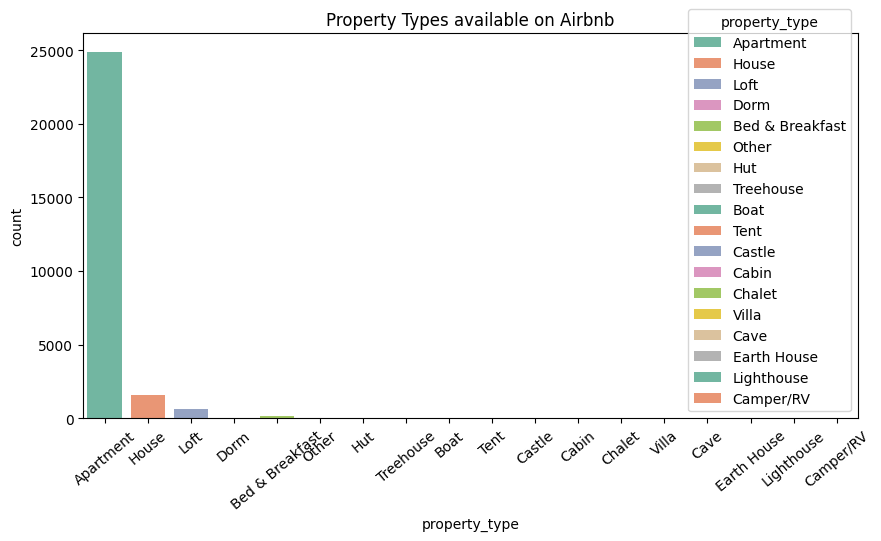

In [165]:
plt.figure(figsize=(10, 5))
plt.title("Property Types available on Airbnb")
sns.countplot(x="property_type", data=df, palette="Set2", hue="property_type")
plt.xticks(rotation=40)
plt.show()


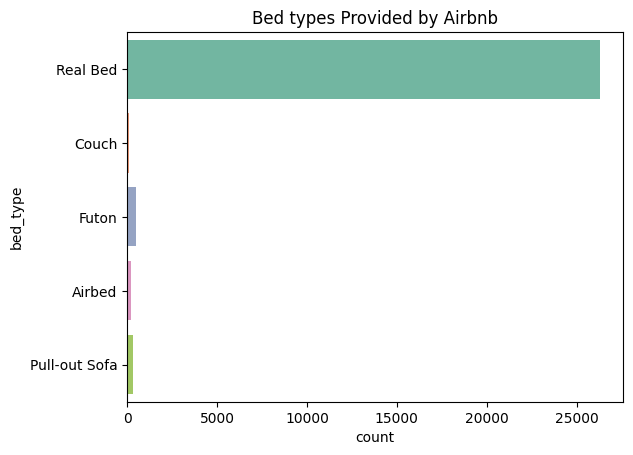

In [166]:
sns.countplot(y="bed_type", data=df, palette="Set2", hue="bed_type")
plt.title("Bed types Provided by Airbnb")
plt.show()

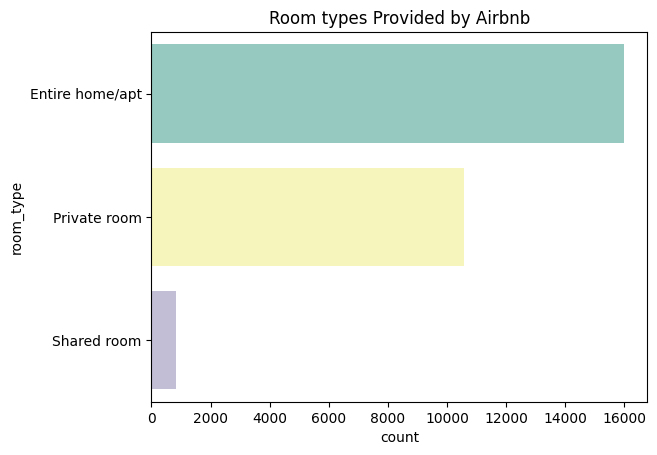

In [167]:
sns.countplot(y="room_type", data=df, palette="Set3", hue="room_type")
plt.title("Room types Provided by Airbnb")
plt.show()

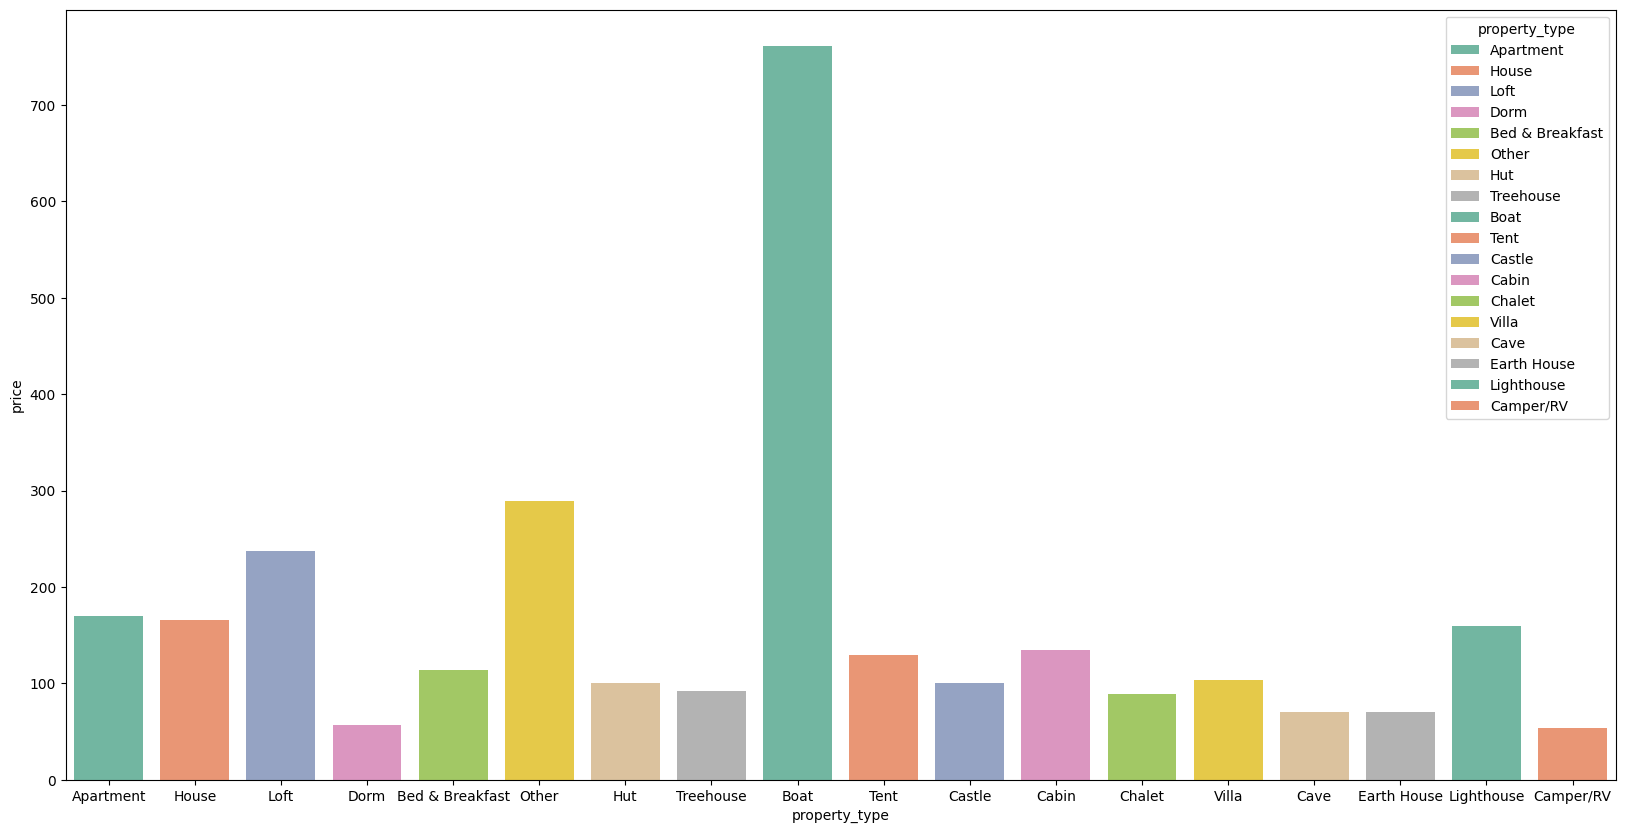

In [168]:
plt.figure(figsize=(20, 10))
sns.barplot(
    data=df,
    x="property_type",
    y="price",
    palette="Set2",
    errorbar=None,
    hue="property_type",
)
plt.show()


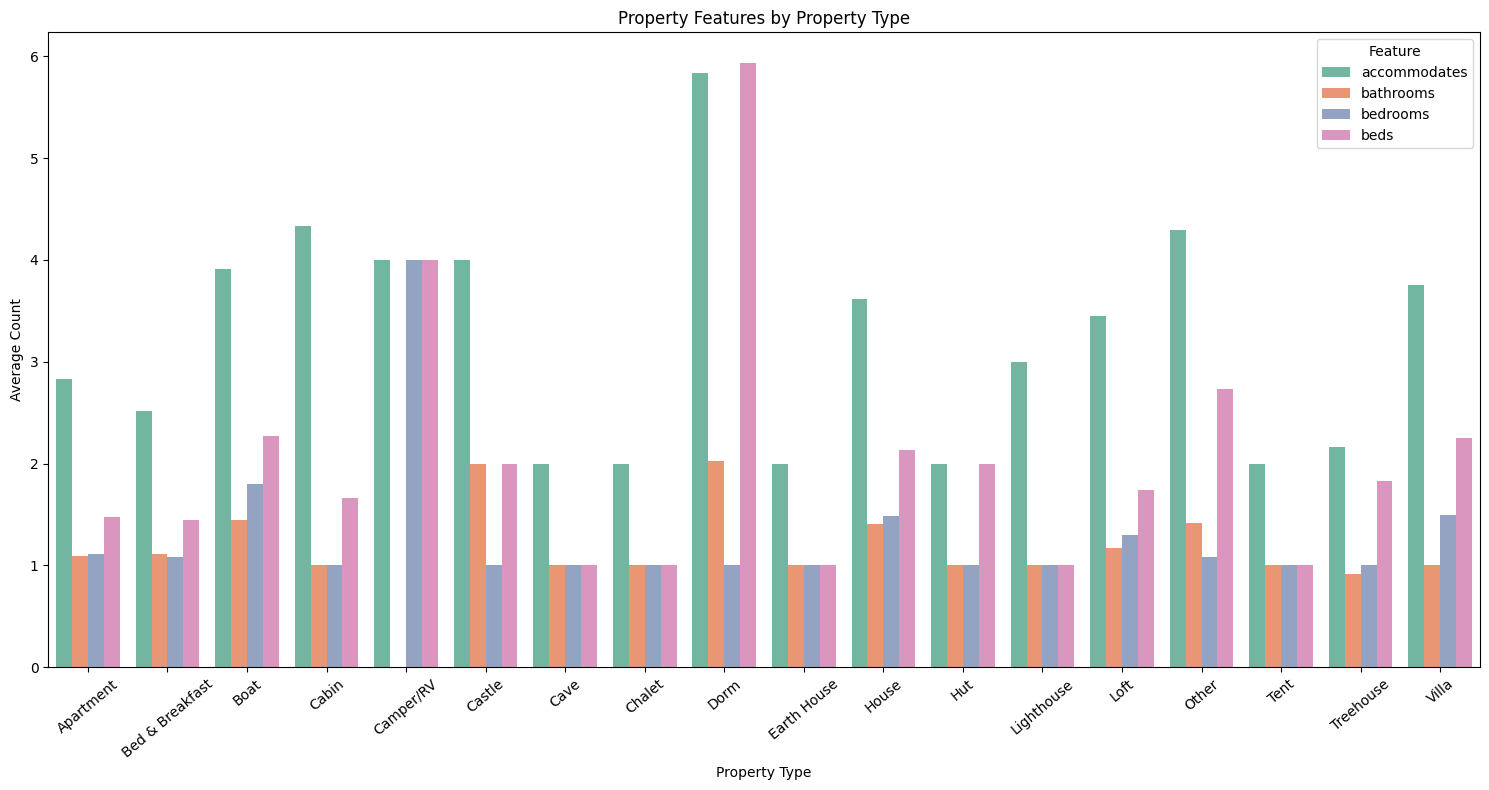

In [169]:
# Prepare the df
grouped_data = (
    df.groupby("property_type")
    .agg(
        {
            "accommodates": "mean",
            "bathrooms": "mean",
            "bedrooms": "mean",
            "beds": "mean",
        }
    )
    .reset_index()
)

# Melt the df for grouped bar plotting
melted_data = grouped_data.melt(
    id_vars="property_type",
    value_vars=["accommodates", "bathrooms", "bedrooms", "beds"],
    var_name="Feature",
    value_name="Average",
)

# Plot
plt.figure(figsize=(15, 8))
sns.barplot(
    data=melted_data, y="Average", x="property_type", hue="Feature", palette="Set2"
)
plt.title("Property Features by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Count")
plt.legend(title="Feature", loc="upper right")
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


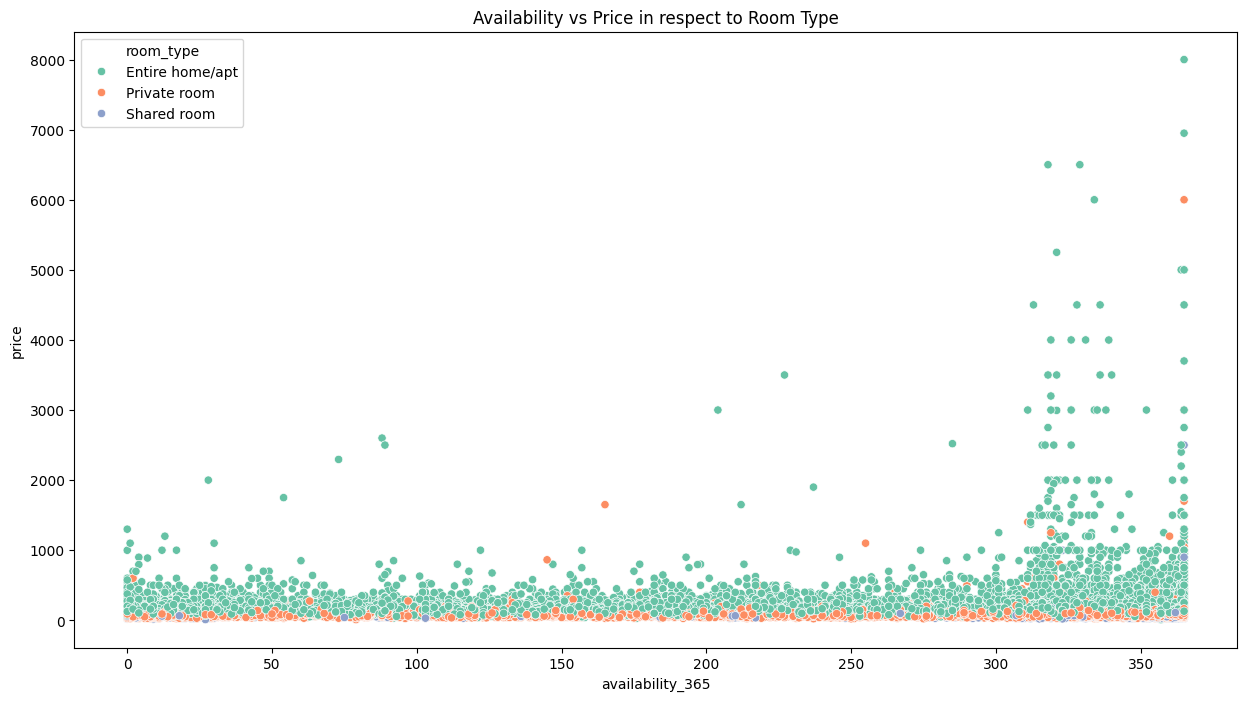

In [170]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=df, x="availability_365", y="price", hue="room_type", palette="Set2"
)
plt.title("Availability vs Price in respect to Room Type")
plt.show()

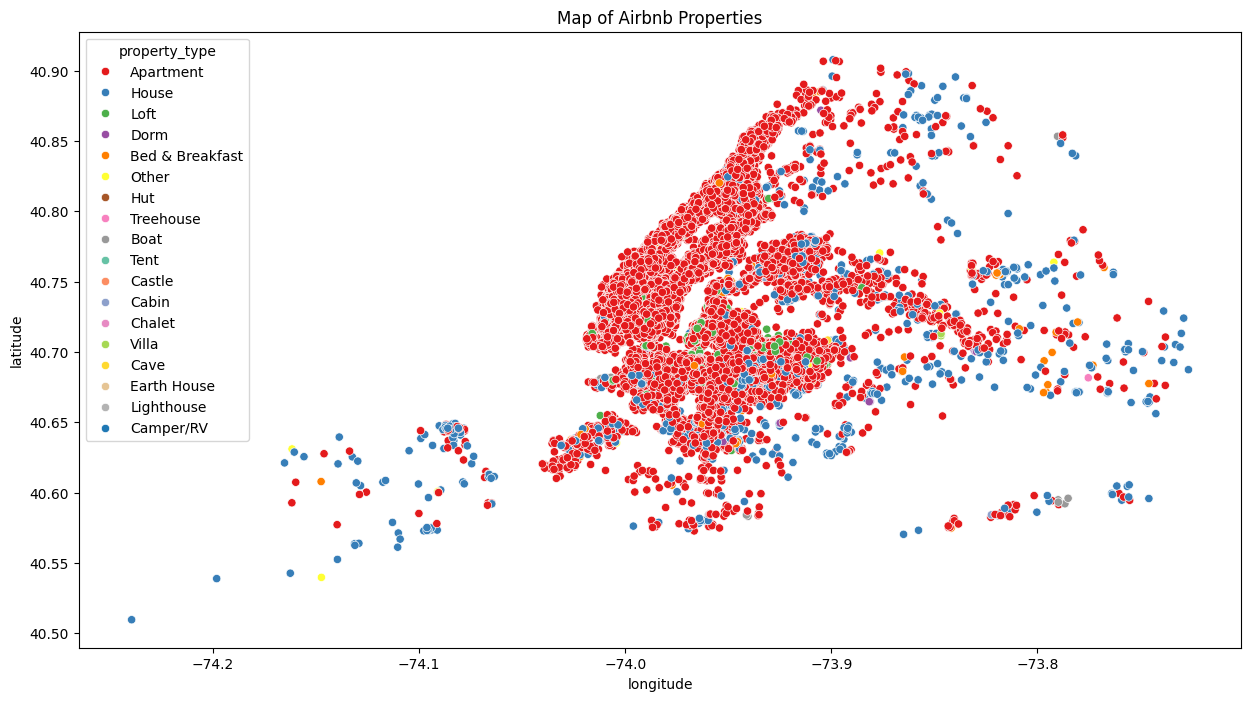

In [171]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=df,
    y="latitude",
    x="longitude",
    hue="property_type",
    palette=[
        "#E41A1C",
        "#377EB8",
        "#4DAF4A",
        "#984EA3",
        "#FF7F00",
        "#FFFF33",
        "#A65628",
        "#F781BF",
        "#999999",
        "#66C2A5",
        "#FC8D62",
        "#8DA0CB",
        "#E78AC3",
        "#A6D854",
        "#FFD92F",
        "#E5C494",
        "#B3B3B3",
        "#1F78B4",
    ],
)
plt.title("Map of Airbnb Properties")
plt.show()

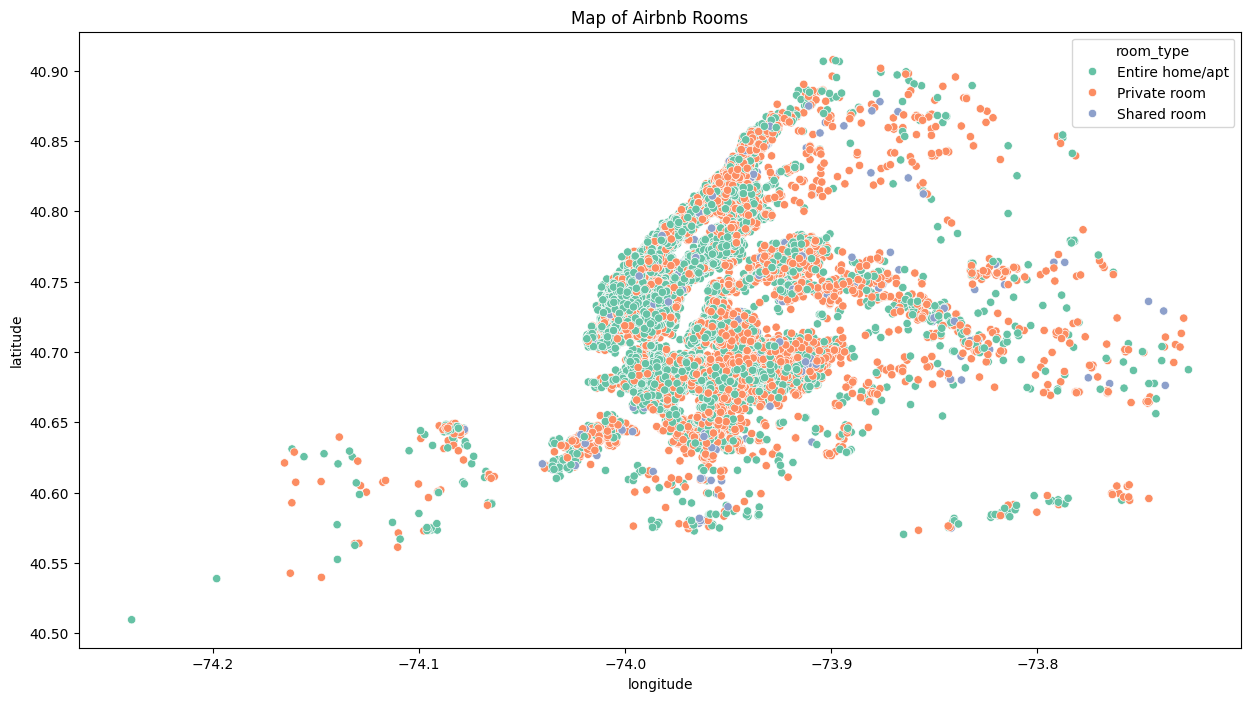

In [172]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, y="latitude", x="longitude", hue="room_type", palette="Set2")
plt.title("Map of Airbnb Rooms")
plt.show()


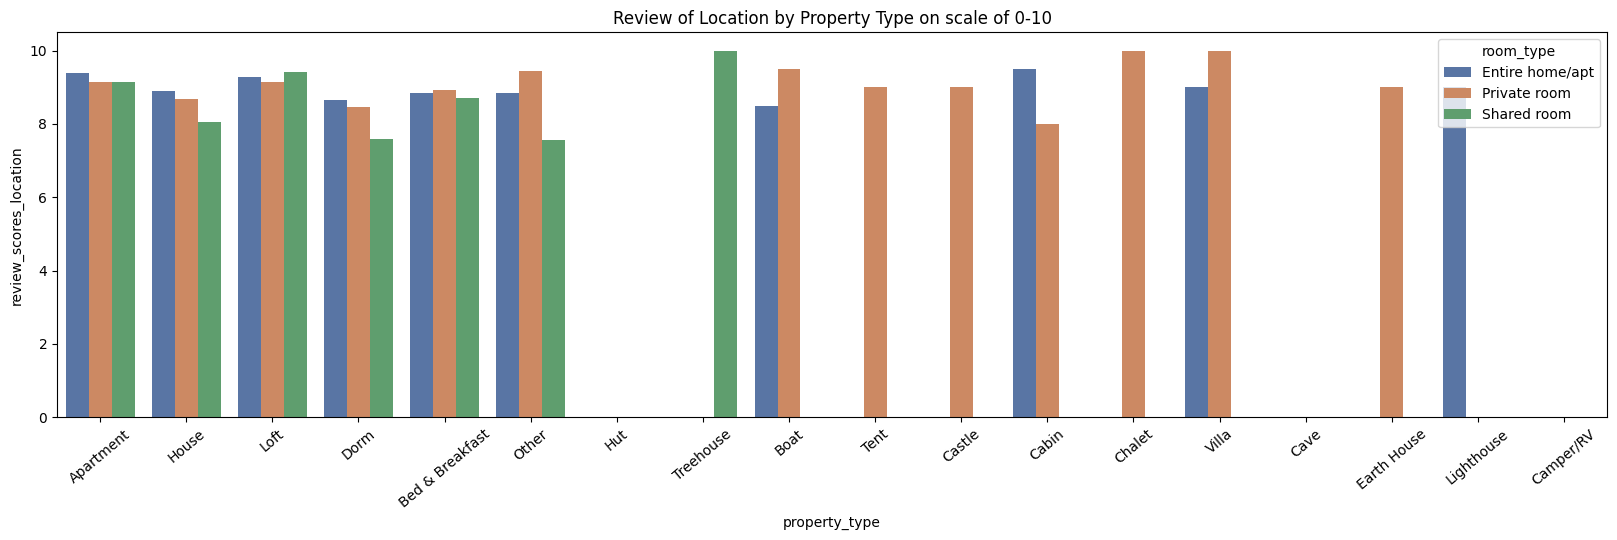

In [173]:
plt.figure(figsize=(20, 5))
sns.barplot(
    data=df,
    y="review_scores_location",
    x="property_type",
    hue="room_type",
    palette="deep",
    errorbar=None,
)
plt.title("Review of Location by Property Type on scale of 0-10")
plt.xticks(rotation=40)
plt.show()


<Figure size 1000x600 with 0 Axes>

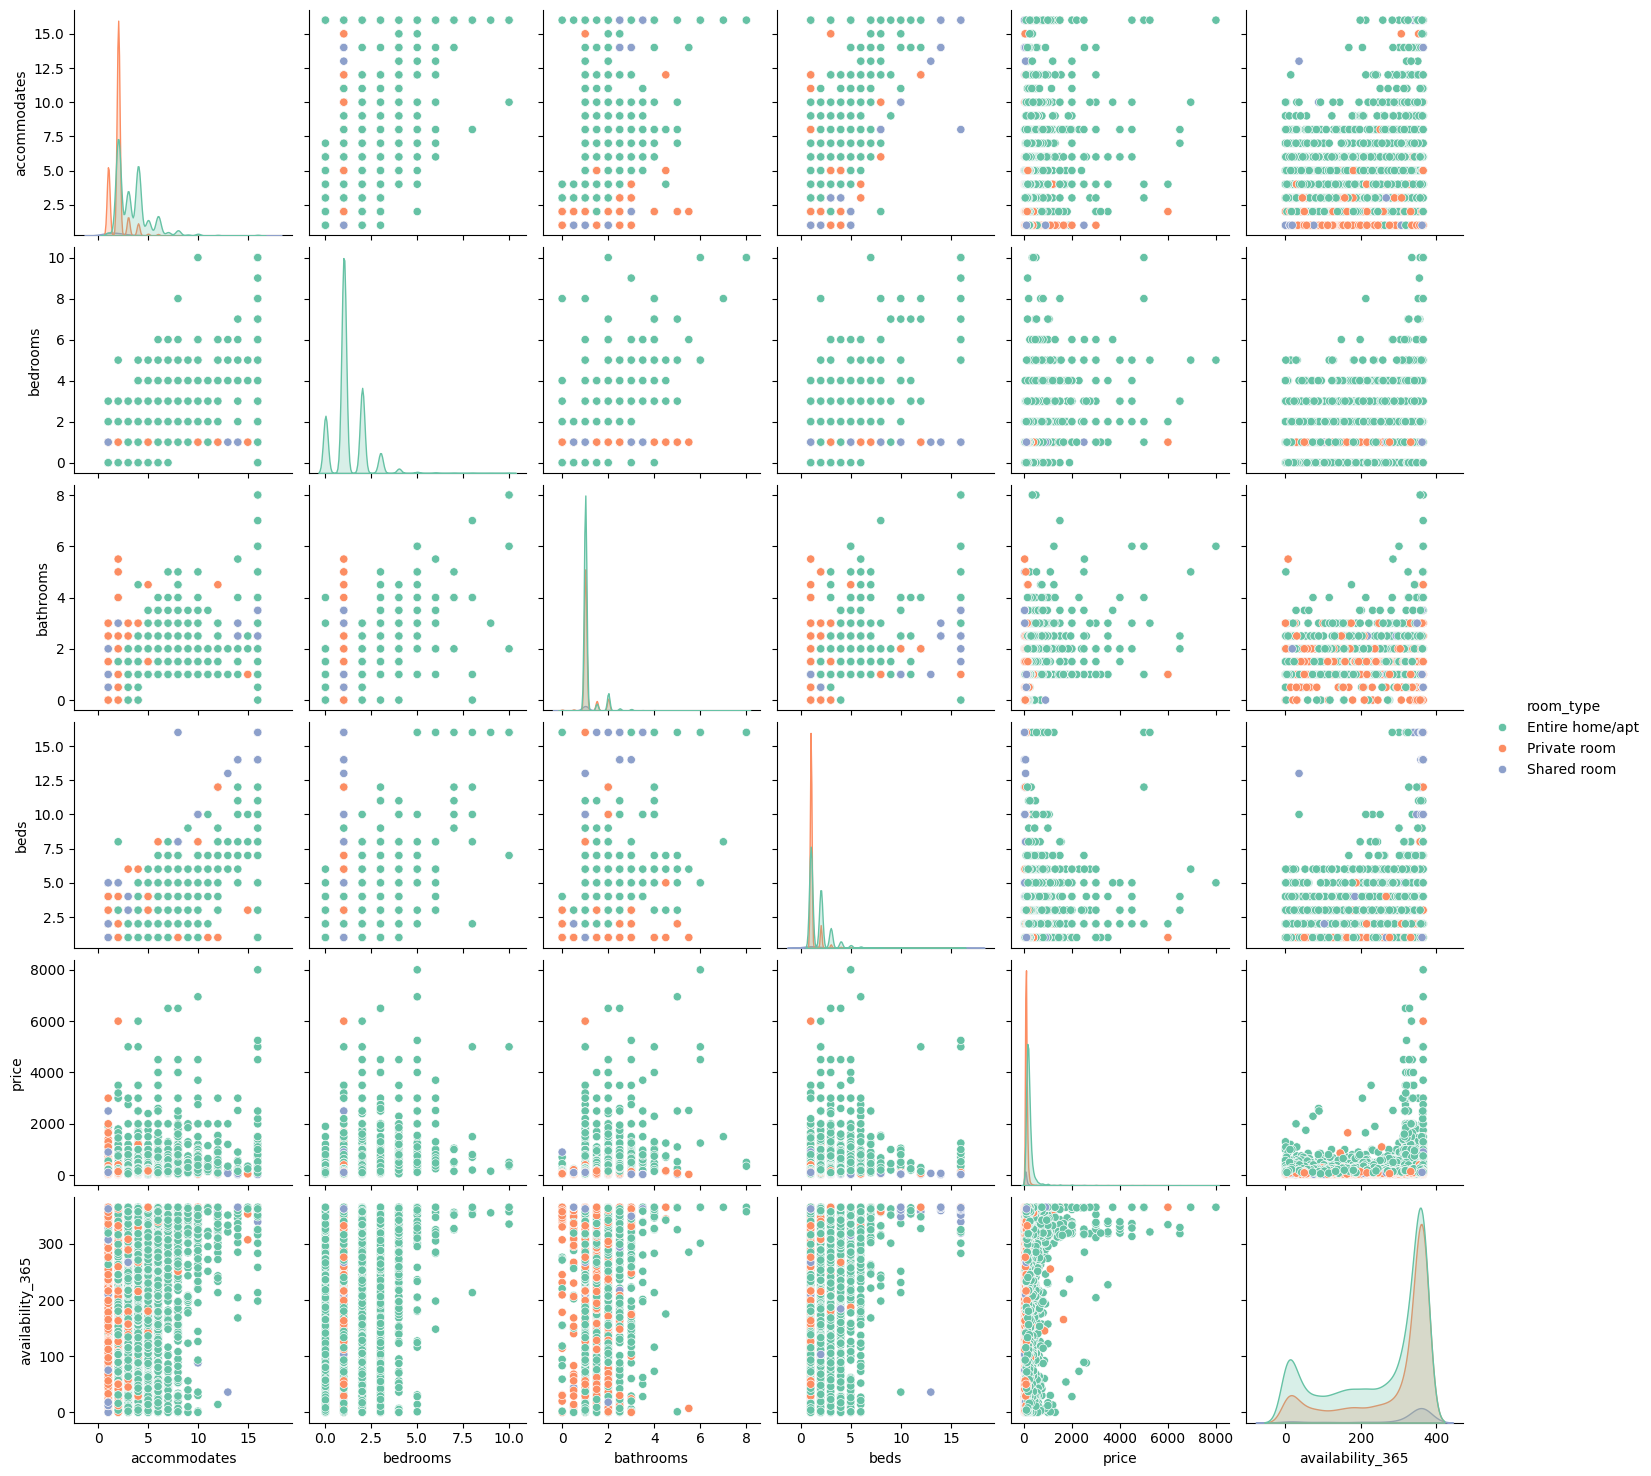

In [174]:
plt.figure(figsize=(10, 6))
sns.pairplot(
    df[
        [
            "accommodates",
            "bedrooms",
            "bathrooms",
            "beds",
            "price",
            "availability_365",
            "property_type",
            "room_type",
            "bed_type",
        ]
    ],
    hue="room_type",
    palette="Set2",
)
plt.show()

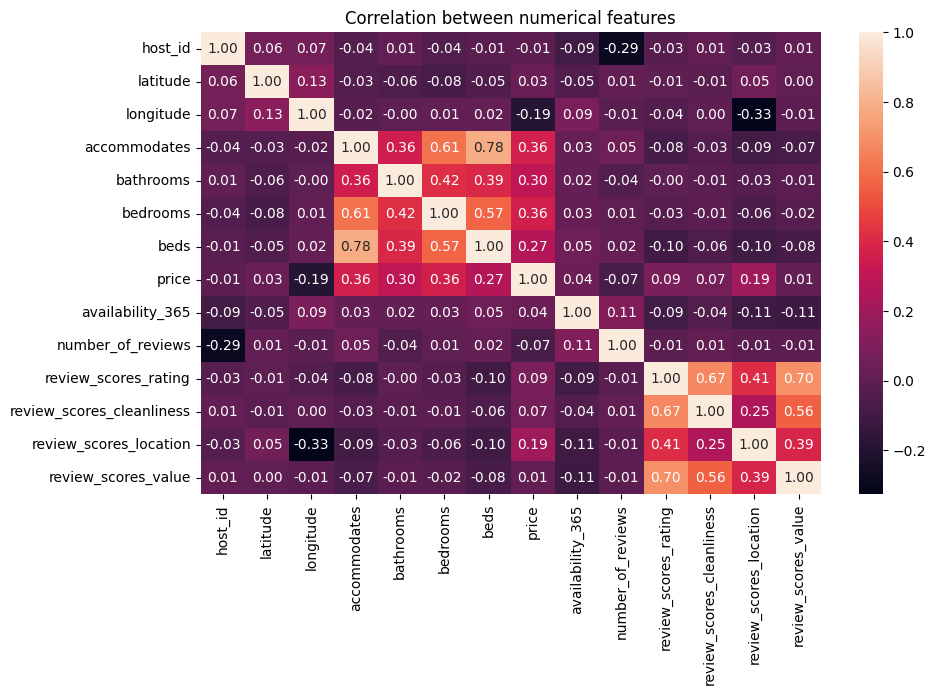

In [175]:
# correlation matrix
plt.figure(figsize=(10, 6))
plt.title("Correlation between numerical features")
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f")
plt.show()

------------
------------
------------

## Data Preprocessing


### Duplicate value check


In [176]:
df.duplicated().sum()

0

No duplicate rows found


-------------
-------------

### Missing value treatment


In [177]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)

review_scores_value          8734
review_scores_location       8732
review_scores_cleanliness    8731
review_scores_rating         8657
bathrooms                     463
zipcode                       162
bedrooms                      140
beds                           98
property_type                   6
state                           2
country                         1
dtype: int64

review_scores can be filled with normal score of 4.8


In [178]:
df["review_scores_cleanliness"] = df["review_scores_cleanliness"].fillna(4.8)

In [179]:
df["review_scores_value"] = df["review_scores_value"].fillna(4.8)

In [180]:
df["review_scores_location"] = df["review_scores_location"].fillna(4.8)

In [181]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(4.8)

-----------
Bathroom

Bathroom can be filled with 0 or to avoid sparsity 0.1 to reduce its weightage


In [182]:
df["bathrooms"] = df["bathrooms"].fillna(0.1)

--------
Zipcode

Zipcode null values can filled using reverse tracking of location with logitude and latitude


In [183]:
# Standardize the zipcodes by removing hyphens and keeping the first 5 digits
df["zipcode"] = df["zipcode"].astype(str).str.extract(r"(\d{5})")

In [184]:
# Handle missing values in the zipcode column using external geocoding service
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="airbnb_geocoder")


# Function to get zip code from lat/lon
def get_zipcode(lat, lon):
    location = geolocator.reverse((lat, lon), exactly_one=True)
    address = location.raw.get("address", {})
    return address.get("postcode", None)


# Apply the function to rows with missing zip codes
df["zipcode"] = df.apply(
    lambda row: get_zipcode(row["latitude"], row["longitude"])
    if pd.isna(row["zipcode"])
    else row["zipcode"],
    axis=1,
)


----------
Bedrooms

Bedrooms can be filled with avg bedrooms in a property type


In [185]:
mean_bedrooms = df.groupby("property_type")["bedrooms"].mean()

df["bedrooms"] = df.apply(
    lambda row: mean_bedrooms[row["property_type"]]
    if pd.isna(row["bedrooms"])
    else row["bedrooms"],
    axis=1,
)

-------
Beds

Similarly filling beds


In [186]:
mean_beds = df.groupby("property_type")["beds"].mean()

df["beds"] = df.apply(
    lambda row: mean_beds[row["property_type"]]
    if pd.isna(row["beds"])
    else row["beds"],
    axis=1,
)

----------
Property_type

property_type can be filled with mode


In [187]:
df["property_type"] = df["property_type"].fillna("Apartment")

In [188]:
# state is New York ,USA
df["state"] = "NY"
df["country"] = "USA"

In [189]:
# Null Value Status
df.isna().sum().sum()

0

------------
------------

### Outlier treatment


In [190]:
df[numerical_features]

,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value
0,5867023,40.756852,-73.964754,2,1.0,1.0,1.0,160.0,322,62,86.0,7.0,10.0,9.0
1,2631556,40.830599,-73.941014,10,1.0,3.0,3.0,105.0,348,22,85.0,8.0,7.0,8.0
2,4601412,40.692189,-73.924120,2,1.0,1.0,2.0,58.0,227,35,98.0,10.0,9.0,10.0
3,198425,40.734751,-74.002592,2,1.0,1.0,1.0,185.0,274,26,96.0,9.0,10.0,9.0
4,22590025,40.745282,-73.997836,2,1.0,1.0,2.0,195.0,365,1,100.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27387,1485898,40.742363,-73.981968,2,0.1,1.0,1.0,130.0,365,3,98.0,9.0,10.0,9.0
27388,5944682,40.759642,-73.985343,2,1.0,1.0,1.0,139.0,332,47,95.0,9.0,10.0,9.0
27389,2675644,40.645741,-74.080955,6,1.0,2.0,3.0,99.0,357,2,90.0,9.0,9.0,8.0
27390,322716,40.669931,-73.946820,3,1.0,1.0,1.0,55.0,93,3,100.0,10.0,9.0,10.0


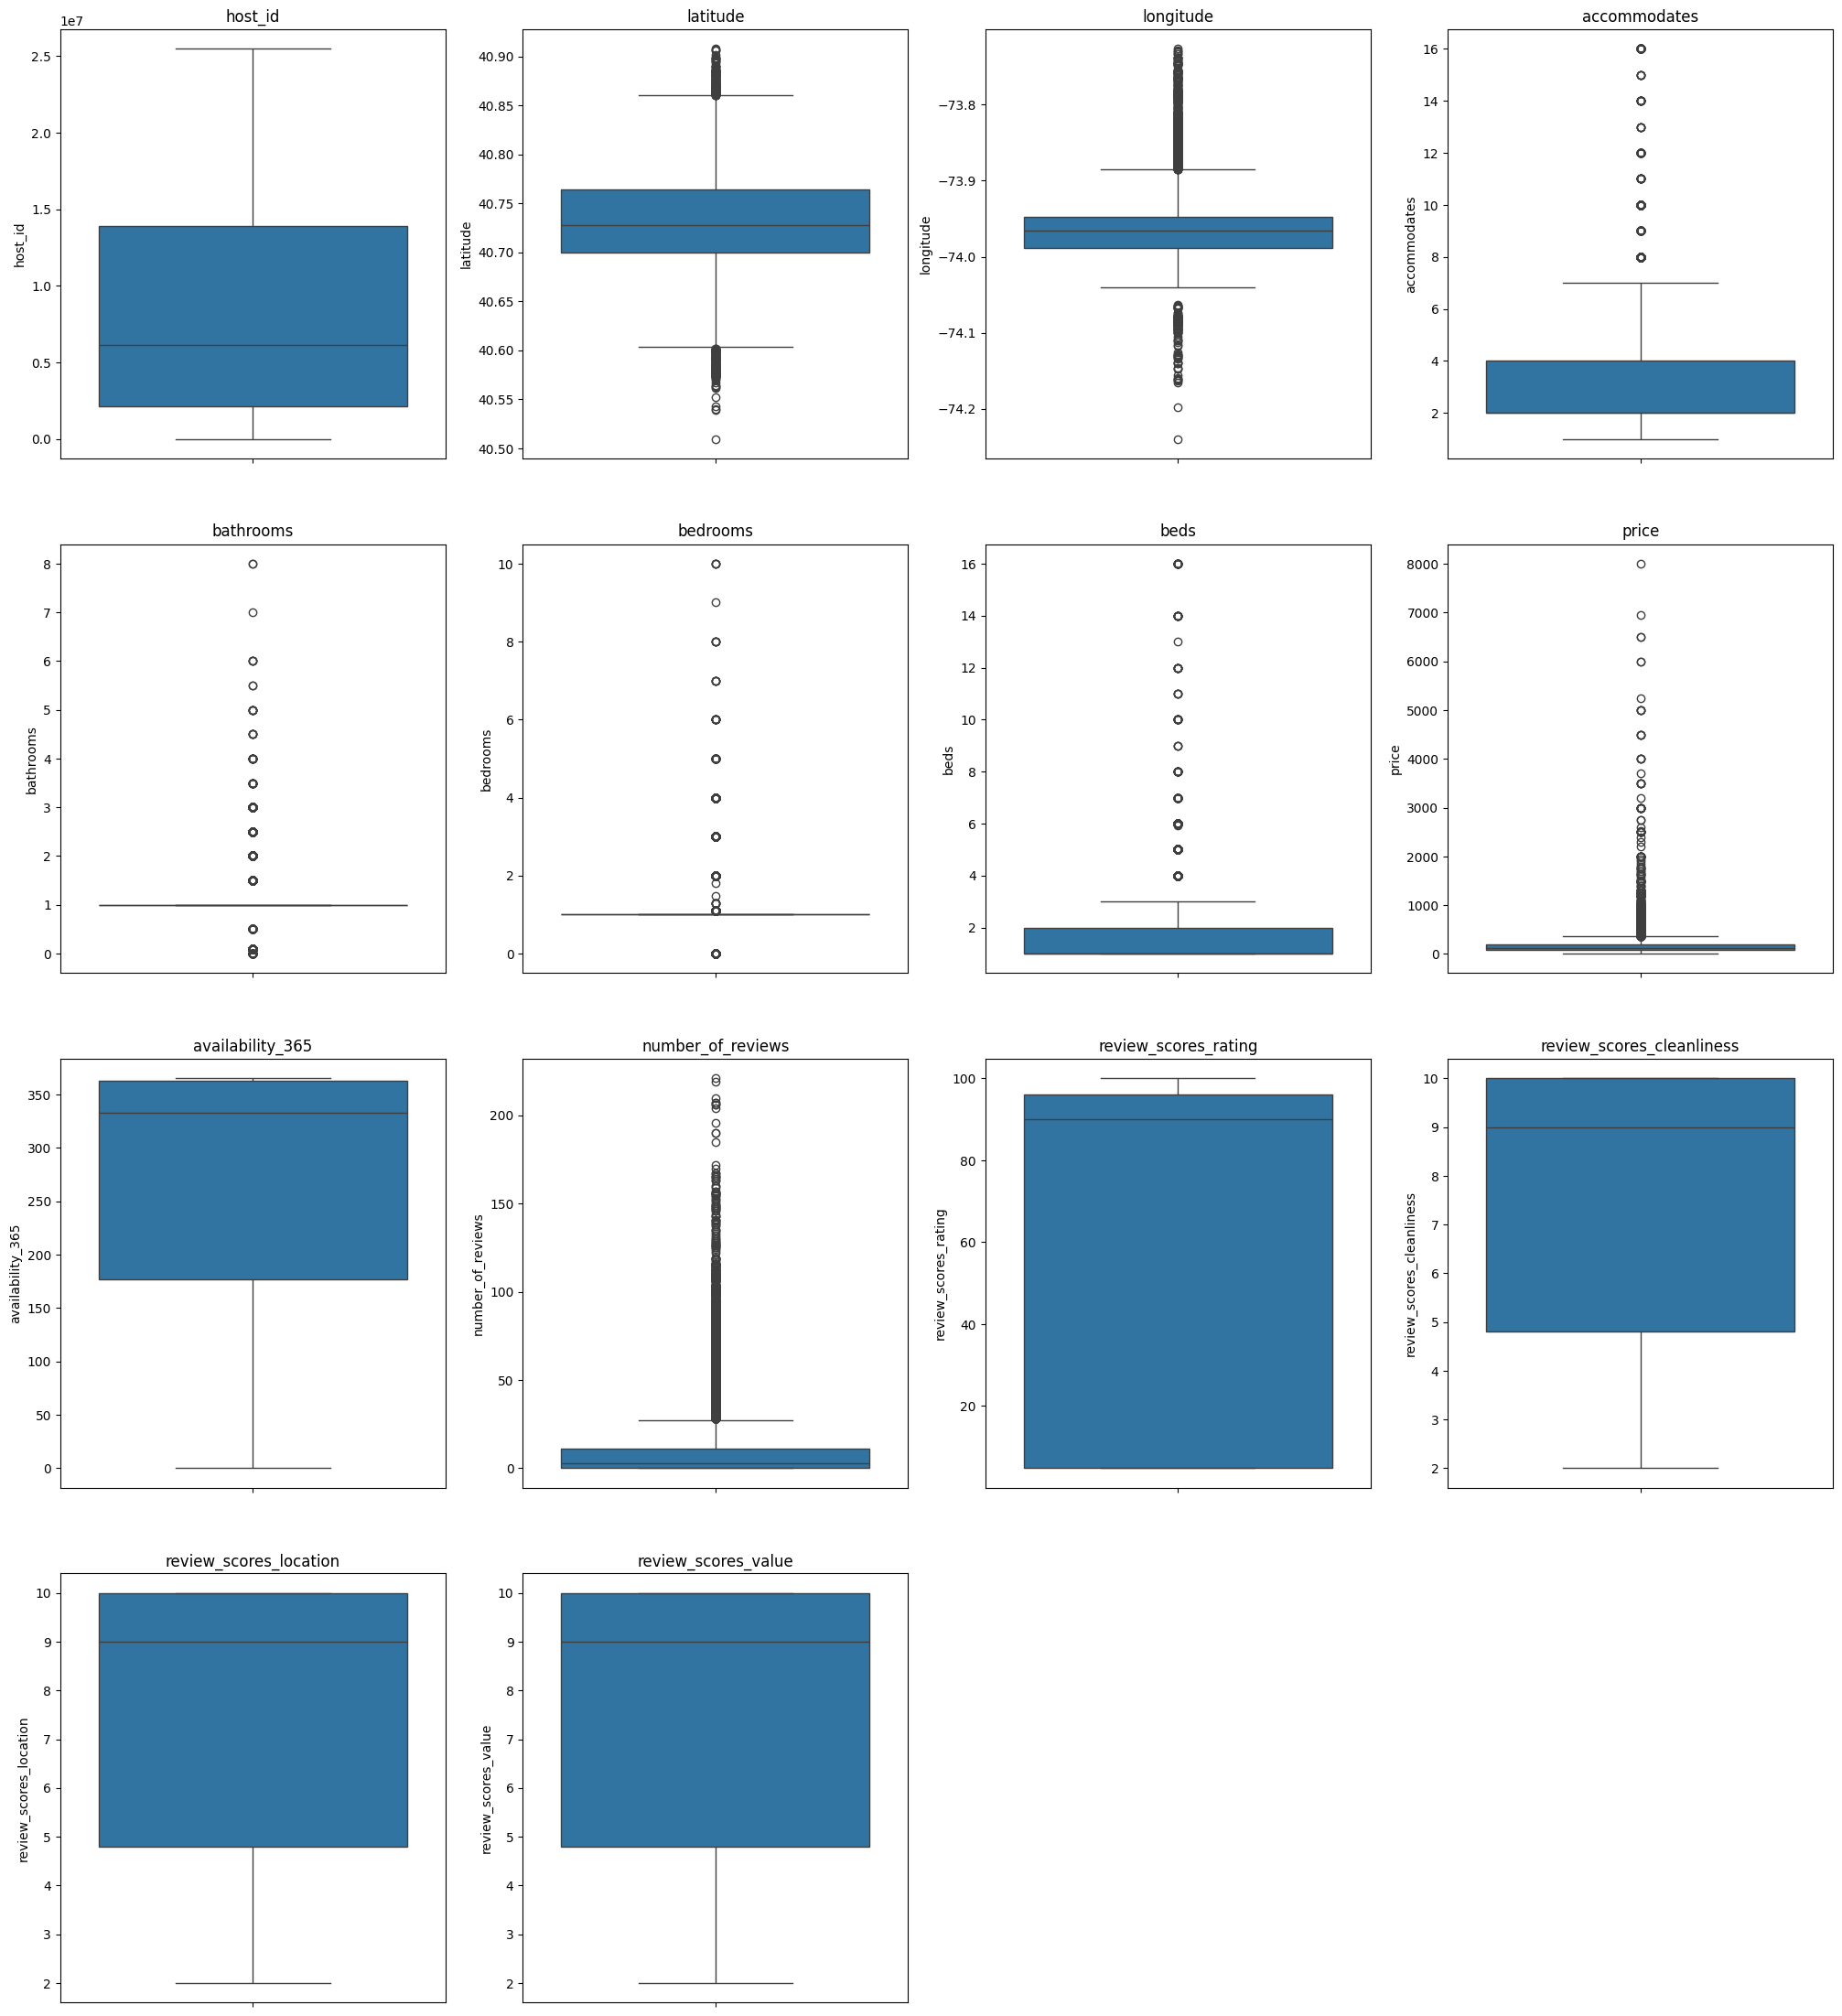

In [191]:
i = 1
plt.figure(figsize=(25, 28))
for col in numerical_features:
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.title(col)
    i += 1
plt.show()


host_id does not need outlier treatment, neither it can be treated


latitude & longitude can't be trated as they are factual data


accommodates should not be trated, as a Dorm can accommodate large number of people than an small apartment


Same reason goes for bathroom,bedrooms and beds


price is the target variable ,hence no outlier tratment will be performed


availablity_365 : does not have any outlier


number_of_reviews : can not be treated as one which is available longer than the other will have more reviews eventually


Rest of these ['review_scores_rating' 'review_scores_cleanliness' 'review_scores_location' 'review_scores_value'] features does not have any outlier to treate


-------------
-------------

### Feature Engineering


host_id , host_name, state and country can be dropped


In [192]:
df = df.drop(["host_id", "host_name", "state", "country"], axis=1)

     By combining "price"  and "accommodates" we figure out the per person cost of living in a property 

In [193]:
df["price_per_person"] = df["price"] / df["accommodates"]

In [194]:
df["price_per_person"].isna().sum()

0

----------------
----------------

### Encoding categorical columns


In [195]:
categorical_features = df.select_dtypes(include=[object]).columns
df[categorical_features].head()

,city,zipcode,property_type,room_type,bed_type
0,New York,10022,Apartment,Entire home/apt,Real Bed
1,New York,10032,Apartment,Entire home/apt,Real Bed
2,Brooklyn,11221,Apartment,Private room,Real Bed
3,New York,10011,Apartment,Entire home/apt,Real Bed
4,New York,10011,Apartment,Entire home/apt,Real Bed


--------------
zipcode

In [196]:
# Encoding zipcode column
df["zipcode"].value_counts().index.sort_values()

Index(['10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007',
       '10009', '10010',
       ...
       '11435', '11436', '11691', '11692', '11693', '11694', '12235', '12512',
       '14072', '84564'],
      dtype='object', name='zipcode', length=186)

In [197]:
df["zipcode"] = df["zipcode"].astype(int)

--------------------------
property_type

In [198]:
# Encoding property_type column
df["property_type"].value_counts().index.sort_values()

Index(['Apartment', 'Bed & Breakfast', 'Boat', 'Cabin', 'Camper/RV', 'Castle',
       'Cave', 'Chalet', 'Dorm', 'Earth House', 'House', 'Hut', 'Lighthouse',
       'Loft', 'Other', 'Tent', 'Treehouse', 'Villa'],
      dtype='object', name='property_type')

In [199]:
property_type_mapping = {
    "Apartment": 1,
    "Bed & Breakfast": 2,
    "Boat": 3,
    "Cabin": 4,
    "Camper/RV": 5,
    "Castle": 6,
    "Cave": 7,
    "Chalet": 8,
    "Dorm": 9,
    "Earth House": 10,
    "House": 11,
    "Hut": 12,
    "Lighthouse": 13,
    "Loft": 14,
    "Other": 15,
    "Tent": 16,
    "Treehouse": 17,
    "Villa": 18,
}

df["property_type"] = df["property_type"].map(property_type_mapping)


-----------
room_type

In [200]:
# Encoding room_type column
df["room_type"].value_counts().index.sort_values()

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [201]:
room_type_mapping = {"Entire home/apt": 1, "Private room": 2, "Shared room": 3}
df["room_type"] = df["room_type"].map(room_type_mapping)

-------------
bed_type

In [202]:
# Encoding bed_type column
df["bed_type"].value_counts().index.sort_values()

Index(['Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'], dtype='object', name='bed_type')

In [203]:
bed_type_mapping = {
    "Airbed": 1,
    "Couch": 2,
    "Futon": 3,
    "Pull-out Sofa": 4,
    "Real Bed": 5,
}
df["bed_type"] = df["bed_type"].map(bed_type_mapping)

In [204]:
mean_beds = df.groupby("property_type")["bed_type"].mean()

df["bed_type"] = df.apply(
    lambda row: mean_beds[row["property_type"]]
    if pd.isna(row["bed_type"])
    else row["bed_type"],
    axis=1,
)

---------------
city

In [205]:
# encoding city column
df["city"].value_counts().sort_values()

city
Brooklyn\rBrooklyn sheepshead bay        1
lonf island city                         1
Kips Bay                                 1
woodhaven boulevard                      1
Brooklyn,  Ny 11221                      1
                                     ...  
Long Island City                       149
Bronx                                  217
Queens                                1142
Brooklyn                              9412
New York                             15656
Name: count, Length: 185, dtype: int64

In [206]:
import category_encoders as ce

city_target_mean = df.groupby("city")["price"].mean()

df["city"] = df["city"].map(city_target_mean)

global_mean = df["price"].mean()
df["city"] = df["city"].fillna(global_mean)

----------------

All features encoded

In [207]:
df[categorical_features].head()

,city,zipcode,property_type,room_type,bed_type
0,205.258112,10022,1,1,5
1,205.258112,10032,1,1,5
2,129.653421,11221,1,2,5
3,205.258112,10011,1,1,5
4,205.258112,10011,1,1,5


------------------------
-----------------------

### Scaling


In [208]:
# Feature Target Split
y = df["price"]
X = df.drop(["price"], axis=1)

In [209]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X)

In [210]:
X.head()

,city,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,review_scores_value,price_per_person
0,0.788847,-0.690496,0.485675,-0.013597,-0.301575,-0.805791,-0.508676,-0.254527,-0.203645,-0.484279,0.18498,0.470142,2.778977,0.519333,-0.306128,0.975777,0.582956,0.239937
1,0.788847,-0.677014,1.991744,0.661566,-0.301575,-0.805791,4.049458,-0.254527,2.799803,1.338288,0.18498,0.677039,0.635936,0.495076,0.151573,-0.373547,0.117906,-0.800377
2,-0.965223,0.926018,-0.834870,1.142040,-0.301575,0.996907,-0.508676,-0.254527,-0.203645,0.427005,0.18498,-0.285831,1.332424,0.810425,1.066976,0.526002,1.048007,-0.523459
3,0.788847,-0.705326,0.034330,-1.089716,-0.301575,-0.805791,-0.508676,-0.254527,-0.203645,-0.484279,0.18498,0.088177,0.850240,0.761910,0.609275,0.975777,0.582956,0.427044
4,0.788847,-0.705326,0.249385,-0.954450,-0.301575,-0.805791,-0.508676,-0.254527,-0.203645,0.427005,0.18498,0.812319,-0.489161,0.858940,1.066976,0.975777,1.048007,0.501887


------------
------------
------------


## Model building with hyperparameter tuning


### Linear Regression using Regularization


In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import (
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)


print("R2 Score normal Model Train: ", r2_score(y_train, y_pred_train))



R2 Score normal Model Train:  0.6776170279094533


In [213]:
# applying regularization

lasso = Lasso(alpha=0.9)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print("R2 Score after L1 Regularization: ", r2_score(y_test, y_pred))

R2 Score after L1 Regularization:  0.6882040282420208


In [214]:
ridge = Ridge(alpha=0.9)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("R2 Score after L2 regularisation: ", r2_score(y_test, y_pred))


R2 Score after L2 regularisation:  0.6876935588098437


K-Fold Validation

In [215]:
from sklearn.model_selection import cross_val_score, cross_validate

scoring = {
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "MSE": make_scorer(mean_squared_error, greater_is_better=False),
    "R2": make_scorer(r2_score),
}

ridge = Ridge(alpha=.9)  # Set regularization strength

# Perform 5-fold cross-validation
cv_results_ridge = cross_validate(
    ridge, X_train, y_train, cv=5, scoring=scoring, return_train_score=True
)

# Aggregate results
print("Ridge Regression Results (5-fold CV):")
print(f"Mean MAE: {np.mean(-cv_results_ridge['test_MAE']):.2f}")
print(f"Mean MSE: {np.mean(-cv_results_ridge['test_MSE']):.2f}")
print(f"Mean R2: {np.mean(cv_results_ridge['test_R2']):.2f}")


Ridge Regression Results (5-fold CV):
Mean MAE: 45.39
Mean MSE: 17471.60
Mean R2: 0.67


In [216]:
y_pred = lr.predict(X_test)
print("R2 Score normal Model: ", r2_score(y_test, y_pred))

R2 Score normal Model:  0.6876876857514747


### Decision Tree


In [217]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate

In [218]:
unscaled_X = df.drop(["price"], axis=1)
y = df["price"]

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)


In [220]:
X_train.shape, y_train.shape

((20544, 18), (20544,))

In [221]:
X_test.shape, y_test.shape


((6848, 18), (6848,))

In [222]:
model = DecisionTreeRegressor()

In [223]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [224]:
print(f"Training Score: {model.score(X_train, y_train)}")

Training Score: 1.0


In [225]:
print(f"Test Score: {model.score(X_test, y_test)}")

Test Score: 0.9549995243794083


K-fold CV


In [226]:
depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for d in depths:
    tree_reg = DecisionTreeRegressor(
        random_state=42, max_depth=d, min_samples_split=10, min_samples_leaf=20
    )
    kfold = KFold(n_splits=3)


    cv_acc_results = cross_validate(
        tree_reg,
        X_train,
        y_train,
        cv=kfold,
        return_train_score=True,
    )

    train_score = cv_acc_results["train_score"].mean() * 100
    val_score = cv_acc_results["test_score"].mean() * 100

    print(f"K-Fold for depth:{d}")
    print(f"Negativee MSE Mean:\nTrain: {train_score}, Validation: {val_score}")
    print("\n---------------------------------------------------------------------")


K-Fold for depth:2
Negativee MSE Mean:
Train: 53.99171035926851, Validation: 50.42473049168565

---------------------------------------------------------------------
K-Fold for depth:3
Negativee MSE Mean:
Train: 67.48291889581263, Validation: 63.58832885715974

---------------------------------------------------------------------
K-Fold for depth:4
Negativee MSE Mean:
Train: 72.39372633719006, Validation: 68.54349476143526

---------------------------------------------------------------------
K-Fold for depth:5
Negativee MSE Mean:
Train: 75.29678760142461, Validation: 71.88573070869535

---------------------------------------------------------------------
K-Fold for depth:6
Negativee MSE Mean:
Train: 78.6109943676894, Validation: 75.24910801808178

---------------------------------------------------------------------
K-Fold for depth:7
Negativee MSE Mean:
Train: 80.57333231295037, Validation: 77.12793492650492

---------------------------------------------------------------------
K-Fol

In [227]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20)
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [228]:
tree_reg.score(X_test, y_test)

0.925701725049568

### Random Forest


In [229]:
from sklearn.ensemble import RandomForestRegressor

In [230]:
rf_reg = RandomForestRegressor(
    random_state=7,
    max_depth=12,
    n_estimators=200,
    ccp_alpha=0.2,
    criterion="squared_error",
)

In [231]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.2, max_depth=12, n_estimators=200,
                      random_state=7)

In [232]:
print(f"Train Accuracy: {round(rf_reg.score(X_train, y_train)*100,2)}")

Train Accuracy: 99.16


In [233]:
cv_results_rf = cross_validate(rf_reg, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

print("Random Forest Results (5-fold CV):")
print(f"Mean MAE: {np.mean(-cv_results_rf['test_MAE']):.2f}")
print(f"Mean MSE: {np.mean(-cv_results_rf['test_MSE']):.2f}")
print(f"Mean R2: {np.mean(cv_results_rf['test_R2']):.2f}")


Random Forest Results (5-fold CV):
Mean MAE: 5.24
Mean MSE: 3861.62
Mean R2: 0.94


In [234]:
print(f"Test Accuracy: {round(rf_reg.score(X_test, y_test)*100,2)}")

Test Accuracy: 96.94


### XGBoost


In [235]:
from xgboost import XGBRegressor

In [236]:
xgb = XGBRegressor(n_estimators=20, learning_rate=0.1, random_state=42)

In [237]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [238]:
print(f"Train Accuracy: {round(xgb.score(X_train, y_train)*100,2)}")

Train Accuracy: 94.56


In [239]:
cv_results_xgb = cross_validate(
    xgb, X_train, y_train, cv=5, scoring=scoring, return_train_score=True
)

print("XGBoost Results (5-fold CV):")
print(f"Mean MAE: {np.mean(cv_results_xgb['test_MAE']):.2f}")
print(f"Mean MSE: {np.mean(cv_results_xgb['test_MSE']):.2f}")
print(f"Mean R2: {np.mean(cv_results_xgb['test_R2']):.2f}")


XGBoost Results (5-fold CV):
Mean MAE: -19.26
Mean MSE: -8852.76
Mean R2: 0.85


In [240]:
print(f"Test Accuracy: {round(xgb.score(X_test, y_test)*100,2)}")

Test Accuracy: 89.37


Training R2 Score: 0.95
Test R2 Score: 0.89


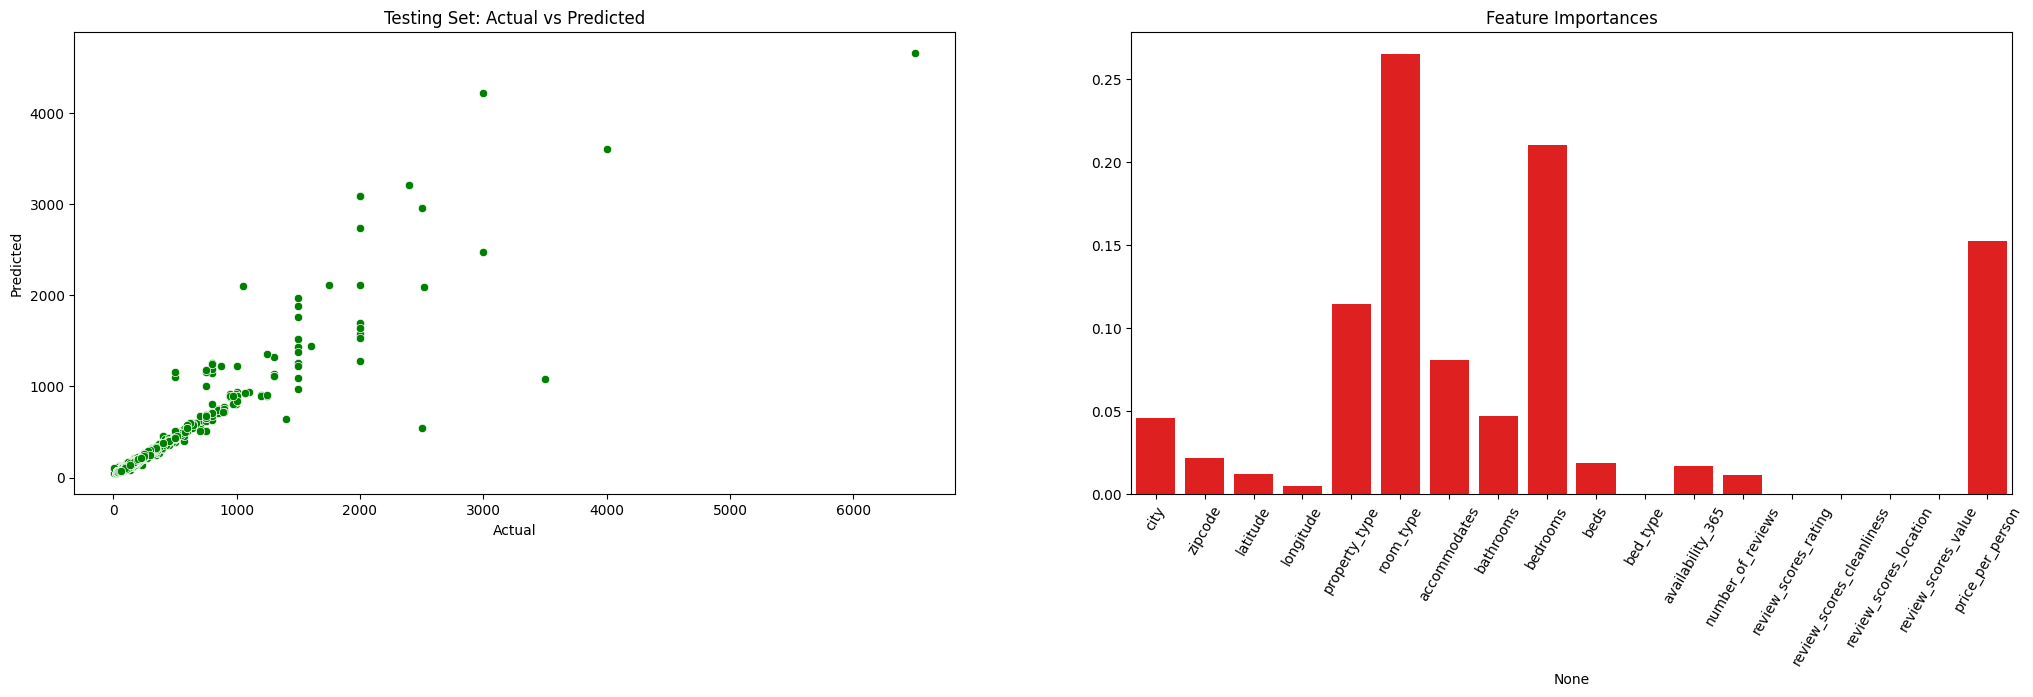

In [241]:
# predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print(f"Training R2 Score: {(train_r2):.2f}")
print(f"Test R2 Score: {(test_r2):.2f}")

plt.figure(figsize=(25, 6))
# Plotting predictions vs actual values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_test_pred, color="green")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Testing Set: Actual vs Predicted")
# plt.show()


# Plot feature importances
feature_importances = xgb.feature_importances_
features = X.columns

importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

plt.subplot(1, 2, 2)
sns.barplot(y=xgb.feature_importances_, x=X.columns, color="red")
plt.title("Feature Importances")
plt.xticks(rotation=60)
plt.show()


In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

xgb2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb2.fit(X_train, y_train)

# Predict on validation and test sets
y_val_pred_xgb = xgb2.predict(X_train)
y_test_pred_xgb = xgb2.predict(X_test)

# Evaluate XGBoost
xgb_metrics = {
    "MAE": mean_absolute_error(y_test, y_test_pred_xgb),
    "MSE": mean_squared_error(y_test, y_test_pred_xgb),
    "R2": r2_score(y_test, y_test_pred_xgb)*100,
}


## Evaluation


As seen above

     Linear Regression Model gives the Trainning Score of 
     67.76% 

    and test score of  68.76% 

After applying L1 Regularization it gives

     68.81% 

With L2 Regularization it gives 

     68.7% 


-   No Exceptional improvement is seen 
-   Also the model does not perform as well

#### Random Forest 

Train accuracy is  

      99.16% 

R2 Score during cross validation is 

      94 

Test Accuracy is 

      96.94% 

- This shows that the dataset is well processed and good quality 

- The Model's hyperparameter are well tuned

Forest gives  highest performance at 

     200 trees 

     max depth of 12 

- Random Forest gives exceptionally high results 
- Its turns out to be the most appropriate model for the dataset

#### Xtream Gradient Boosting XGB

Traing Accuracy is

     94.56% 

Cross validation Mean R2 score

     85% 

Testing Performance 

     89.37% 
    

- The Model solves the error best with 20 stumps


- Bedrooms and room_type turnsout to be the most important feature

- price_per_person feature which was engineeder using target feature [price], highly impacted the model's prediction performance